In [1]:
#standard libraries
import pandas as pd
import numpy as np
import tensorflow as tf

#visualization
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
import seaborn as sns


In [42]:
alarms = pd.read_csv("./dataframes/pivot_alarms_cleaned.csv")

In [43]:
alarms

,DateTime,2421,2445,4203,6280,6336,7167,9218,9219,9495,...,22019,22020,22021,22022,22024,22040,22045,24324,35002,49317
0,2022-01-03 09:53:36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-01-03 10:31:02,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-03 10:55:39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-01-03 10:59:57,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-01-03 11:23:14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81105,2023-01-31 23:53:15,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81106,2023-01-31 23:55:07,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81107,2023-01-31 23:56:33,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
81108,2023-01-31 23:58:37,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
alarms['DateTime'] = (pd.to_datetime(alarms['DateTime'])).dt.floor('min')
alarms



,DateTime,2421,2445,4203,6280,6336,7167,9218,9219,9495,...,22019,22020,22021,22022,22024,22040,22045,24324,35002,49317
0,2022-01-03 09:53:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-01-03 10:31:00,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-03 10:55:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-01-03 10:59:00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-01-03 11:23:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81105,2023-01-31 23:53:00,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81106,2023-01-31 23:55:00,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81107,2023-01-31 23:56:00,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
81108,2023-01-31 23:58:00,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
grouped = alarms.groupby('DateTime').sum()
# grouped.set_index('DateTime', inplace=True)

In [51]:
grouped

,2421,2445,4203,6280,6336,7167,9218,9219,9495,11225,...,22019,22020,22021,22022,22024,22040,22045,24324,35002,49317
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:53:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-01-03 10:31:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 10:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-01-03 10:59:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 11:23:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:50:00,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-31 23:53:00,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-31 23:55:00,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
alarms=grouped.resample('1T').asfreq()
alarms = alarms.fillna(0)
alarms

,2421,2445,4203,6280,6336,7167,9218,9219,9495,11225,...,22019,22020,22021,22022,22024,22040,22045,24324,35002,49317
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:53:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-03 09:54:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:54:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 23:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 23:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
downtime_df = pd.read_csv('all_downtimes_processed.csv')
downtime_df.head()

,DateTime,trigger,downtime
0,2020-01-06 10:00:00,1.0,1
1,2020-01-06 10:01:00,0.0,1
2,2020-01-06 10:02:00,0.0,1
3,2020-01-06 10:03:00,0.0,1
4,2020-01-06 10:04:00,0.0,1


In [61]:
downtime_df['DateTime'] = pd.to_datetime(downtime_df['DateTime'])
downtime_df.set_index('DateTime', inplace=True)

In [62]:
downtime_df

,trigger,downtime
DateTime,,
2020-01-06 10:00:00,1.0,1
2020-01-06 10:01:00,0.0,1
2020-01-06 10:02:00,0.0,1
2020-01-06 10:03:00,0.0,1
2020-01-06 10:04:00,0.0,1
...,...,...
2023-05-04 09:21:00,0.0,0
2023-05-04 09:22:00,0.0,0
2023-05-04 09:23:00,0.0,0


In [65]:
downtime_df

,trigger,downtime
DateTime,,
2020-01-06 10:00:00,1.0,1
2020-01-06 10:01:00,0.0,1
2020-01-06 10:02:00,0.0,1
2020-01-06 10:03:00,0.0,1
2020-01-06 10:04:00,0.0,1
...,...,...
2023-05-04 09:21:00,0.0,0
2023-05-04 09:22:00,0.0,0
2023-05-04 09:23:00,0.0,0


In [66]:
df = alarms.merge(downtime_df, left_index= True, right_index= True, how="left")

In [67]:
df

,2421,2445,4203,6280,6336,7167,9218,9219,9495,11225,...,22021,22022,22024,22040,22045,24324,35002,49317,trigger,downtime
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:53:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2022-01-03 09:54:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-03 09:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-03 09:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-03 09:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:54:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-31 23:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-31 23:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [68]:
df.trigger.sum()

757.0

In [72]:
trigger_idx = df[df['trigger'] == 1].index
trigger_idx

DatetimeIndex(['2022-01-03 10:00:00', '2022-01-04 05:58:00',
               '2022-01-05 02:46:00', '2022-01-05 03:31:00',
               '2022-01-05 23:25:00', '2022-01-05 23:51:00',
               '2022-01-06 00:10:00', '2022-01-06 08:39:00',
               '2022-01-07 04:32:00', '2022-01-07 06:35:00',
               ...
               '2023-01-26 16:11:00', '2023-01-27 12:00:00',
               '2023-01-30 11:02:00', '2023-01-30 14:16:00',
               '2023-01-31 02:38:00', '2023-01-31 09:27:00',
               '2023-01-31 12:42:00', '2023-01-31 14:23:00',
               '2023-01-31 14:59:00', '2023-01-31 19:43:00'],
              dtype='datetime64[ns]', name='DateTime', length=757, freq=None)

In [88]:
selected_rows = []
for idx in trigger_idx:
    start_time = idx - pd.Timedelta(5, unit='m')
    end_time = idx - pd.Timedelta(1, unit='m')
    selected_rows.append(alarms.loc[start_time : end_time])

In [89]:
selected_rows_df = pd.concat(selected_rows)

In [90]:
selected_rows_df

,2421,2445,4203,6280,6336,7167,9218,9219,9495,11225,...,22019,22020,22021,22022,22024,22040,22045,24324,35002,49317
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:59:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 19:38:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 19:39:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 19:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
selected_rows_df.sum().sort_values(ascending=False)

7167     101.0
11226     81.0
6280      62.0
11232     59.0
4203      55.0
11231     40.0
9219      39.0
49317     31.0
24324     28.0
11225     26.0
15053     19.0
16226     17.0
9218      16.0
11227     10.0
11228      8.0
2421       8.0
2445       7.0
18023      7.0
6336       7.0
9495       4.0
22045      2.0
22018      1.0
22021      1.0
22040      1.0
22017      0.0
22020      0.0
22022      0.0
22024      0.0
35002      0.0
22019      0.0
dtype: float64

In [81]:
alarms

,2421,2445,4203,6280,6336,7167,9218,9219,9495,11225,...,22019,22020,22021,22022,22024,22040,22045,24324,35002,49317
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:53:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-03 09:54:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:54:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 23:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 23:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
alarms['7167'].sum()

9169.0

Text(0.5, 1.0, 'GLA3_CO_258_028')

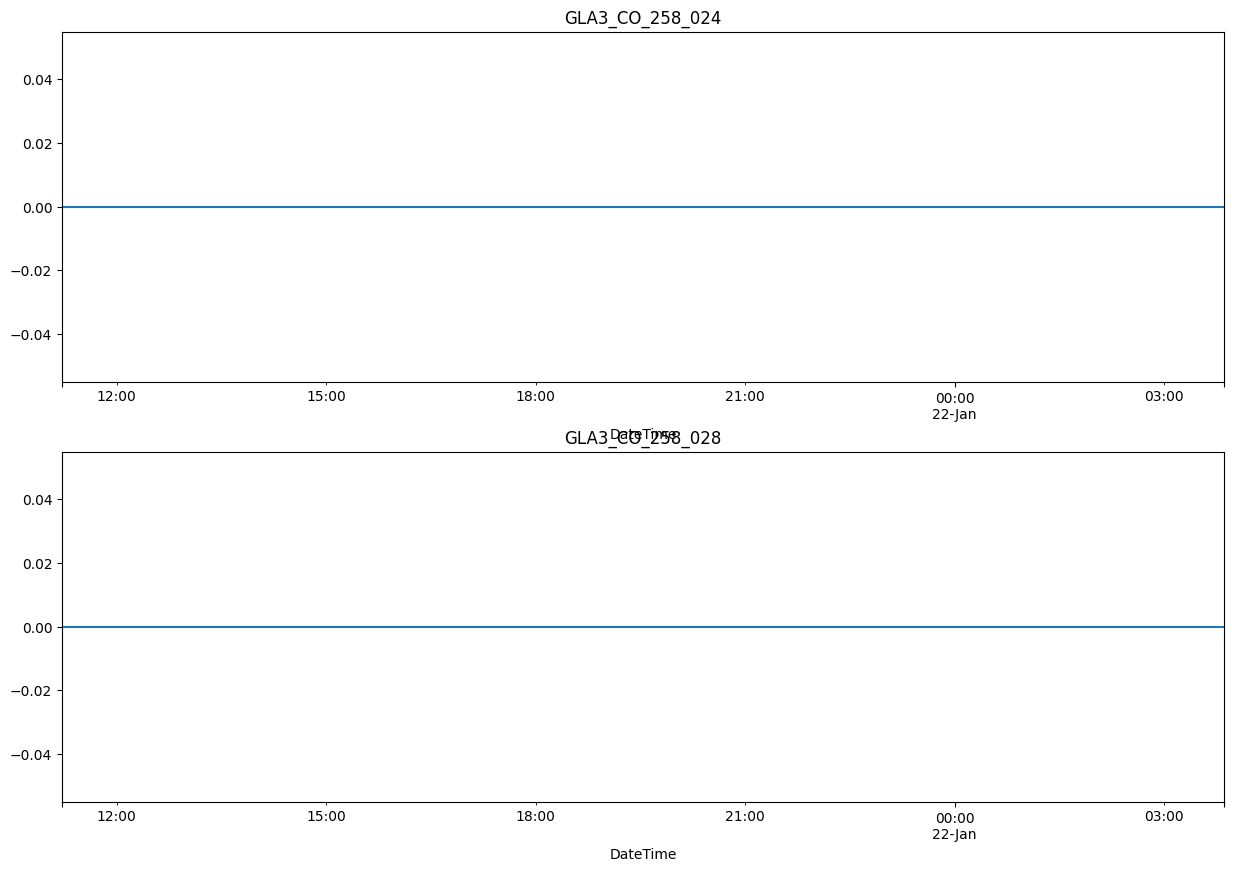

In [94]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))


alarms['11226'][26000:27000].plot(ax=ax1)
alarms['11227'][26000:27000].plot(ax=ax2)


ax1.set_title('GLA3_CO_258_024')
ax2.set_title('GLA3_CO_258_028')

